In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facial-emotion-dataset-csv/emodata.csv
/kaggle/input/fer2013/fer2013.csv


In [2]:
!pip install --upgrade pip
!pip install numpy==1.26.4 tensorflow==2.17.0  keras==3.2.0  seaborn==0.11.2 scikit-learn==1.2.2 matplotlib==3.7.1 plotly==5.10.0 pandas==2.1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 133.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [3]:
# !pip list


In [4]:
# pip freeze > requirements.txt


1. Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import keras
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential, Model
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D, Activation, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px
import matplotlib.pyplot as plt
import warnings

# Turn off warnings
warnings.simplefilter("ignore")


2. Loading the data

In [6]:
data = pd.read_csv("/kaggle/input/facial-emotion-dataset-csv/emodata.csv")
data.shape

(49387, 3)

In [7]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [8]:
data.head()

,emotion,pixels,Usage
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,test
1,0,176 177 170 168 173 171 167 169 166 139 98 107...,test
2,0,26 34 23 8 12 22 31 22 24 29 39 47 56 72 83 10...,test
3,0,123 125 149 130 122 94 57 60 89 72 76 95 99 86...,test
4,0,42 41 47 48 46 54 59 62 73 82 97 100 97 103 10...,test


3. Data pre-processing

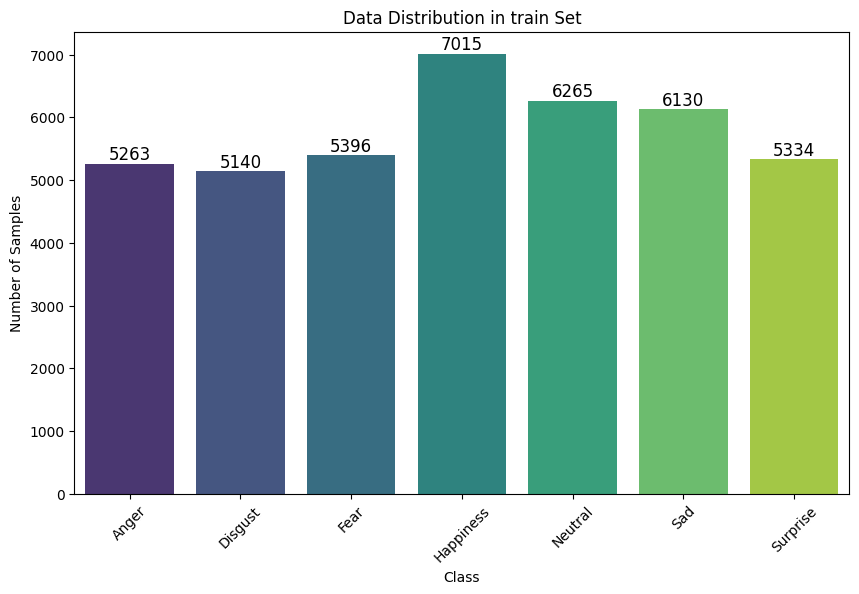

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
CLASS_LABELS = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sad', 'Surprise']
# Function to plot data distribution from fer2013.csv
def plot_data_distribution_from_csv(data, usage='train'):
 

    # Lọc dữ liệu theo Usage
    filtered_data = data[data['Usage'] == usage]

    # Đếm số lượng mẫu cho từng nhãn cảm xúc
    emotion_counts = filtered_data['emotion'].value_counts().sort_index()

    # Gán nhãn cảm xúc
   

    # Tạo biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=CLASS_LABELS, y=emotion_counts, palette="viridis")

    # Hiển thị số lượng trên các cột
    for i, count in enumerate(emotion_counts):
        plt.text(
            i,
            count + 0.5,
            str(count),
            ha="center",
            va="bottom",
            fontsize=12,
            color="black",
        )

    # Cập nhật tiêu đề và nhãn
    plt.title(f"Data Distribution in {usage} Set")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.show()

# Gọi hàm với đường dẫn tới fer2013.csv
plot_data_distribution_from_csv(data, usage='train')


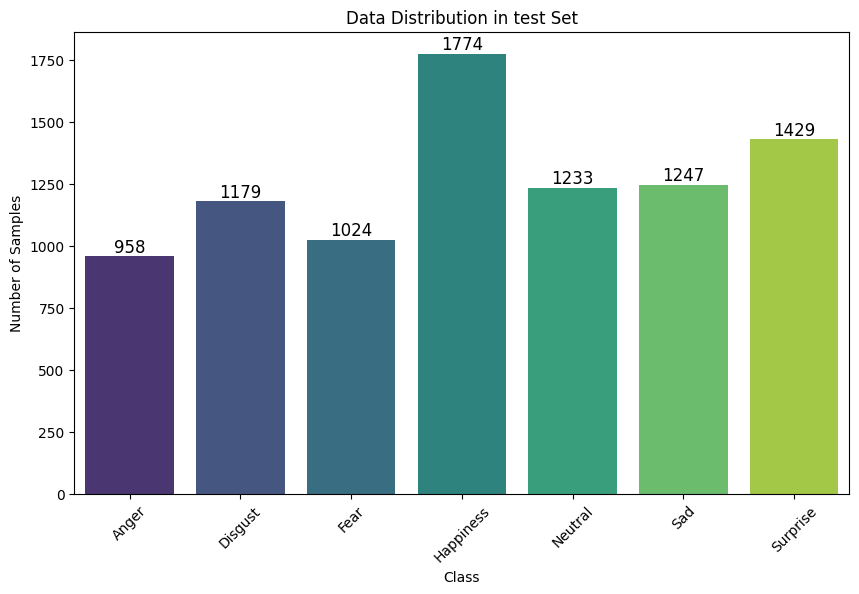

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
CLASS_LABELS = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sad', 'Surprise']
# Function to plot data distribution from fer2013.csv
def plot_data_distribution_from_csv(data, usage='test'):
 

    # Lọc dữ liệu theo Usage
    filtered_data = data[data['Usage'] == usage]

    # Đếm số lượng mẫu cho từng nhãn cảm xúc
    emotion_counts = filtered_data['emotion'].value_counts().sort_index()

    # Gán nhãn cảm xúc
   

    # Tạo biểu đồ
    plt.figure(figsize=(10, 6))
    sns.barplot(x=CLASS_LABELS, y=emotion_counts, palette="viridis")

    # Hiển thị số lượng trên các cột
    for i, count in enumerate(emotion_counts):
        plt.text(
            i,
            count + 0.5,
            str(count),
            ha="center",
            va="bottom",
            fontsize=12,
            color="black",
        )

    # Cập nhật tiêu đề và nhãn
    plt.title(f"Data Distribution in {usage} Set")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.xticks(rotation=45)
    plt.show()

# Gọi hàm với đường dẫn tới fer2013.csv
plot_data_distribution_from_csv(data, usage='test')


3.1 Shuffling the data

In [11]:
# Shuffle và reset index
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

3.2 One Hot Encoding

In [12]:
# Chuẩn bị nhãn
labels = to_categorical(data['emotion'], num_classes=7)  # Chuyển đổi nhãn cảm xúc thành one-hot encoding


In [13]:
# Chuyển đổi pixel từ chuỗi sang mảng 48x48 và thay đổi kiểu dữ liệu thành float32
pixels = np.array([np.fromstring(p, sep=' ') for p in data['pixels']], dtype='float32')
pixels = pixels.reshape((data.shape[0], 48, 48, 1))  # Đảm bảo dữ liệu có hình dạng (n, 48, 48, 1)


3.5 Train test validation split

In [14]:
# Chuẩn hóa dữ liệu pixel
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels.reshape((data.shape[0], -1))).reshape((data.shape[0], 48, 48, 1))

In [15]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra (90% - 10%)
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1, shuffle=False)

# Chia tập huấn luyện thành tập huấn luyện và tập validation (90% huấn luyện, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [16]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Validation shape:", X_val.shape)

Train shape: (35558, 48, 48, 1)
Test shape: (4939, 48, 48, 1)
Validation shape: (8890, 48, 48, 1)


3.6 Data augmentation using ImageDataGenerator

In [17]:
datagen = ImageDataGenerator(
    # Các tham số chuẩn hóa và bình thường hóa dữ liệu
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    
    # Các phép biến đổi hình ảnh
    rotation_range=20,  # Xoay hình ảnh trong phạm vi từ 0 đến 20 độ
    zoom_range=0.2,  # Tăng giảm kích thước ảnh (zoom in/out)
    width_shift_range=0.1,  # Dịch chuyển hình ảnh theo chiều ngang (10% ảnh)
    height_shift_range=0.1,  # Dịch chuyển hình ảnh theo chiều dọc (10% ảnh)
    
    # Lật hình ảnh ngang hoặc dọc
    horizontal_flip=True,  # Lật ảnh theo chiều ngang (phù hợp với nhiều dữ liệu)
    vertical_flip=False,  # Tắt lật ảnh theo chiều dọc (thường không cần với bộ dữ liệu cảm xúc)
    
    # Các phương pháp khác để cải thiện mô hình
    shear_range=0.2,  # Xoay nghiêng ảnh theo một góc nhất định
    fill_mode='nearest',  # Cách điền các pixel bị thiếu sau khi thực hiện các phép biến đổi (nearest là phương pháp tốt nhất cho ảnh)
)
valgen = ImageDataGenerator()

In [18]:
# Áp dụng fit cho dữ liệu huấn luyện
datagen.fit(X_train)

In [19]:
# Tạo generator cho huấn luyện và validation
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = valgen.flow(X_val, y_val, batch_size=32)

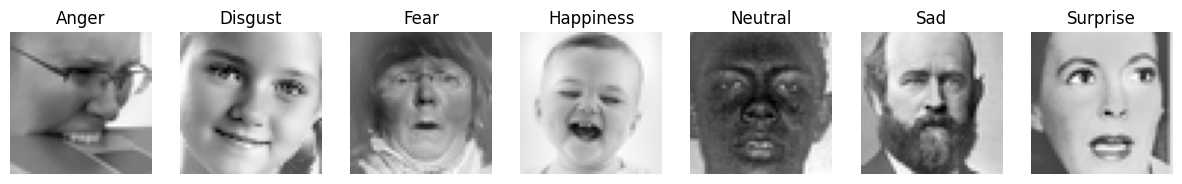

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Hiển thị mỗi một ảnh ngẫu nhiên tương ứng với 7 class
plt.figure(figsize=(15, 23))
label_dict = {0: 'Angry', 2: 'Disgust', 3: 'Fear', 4: 'Happy', 5: 'Neutral', 6: 'Sad', 7: 'Surprise'}

# Lặp qua từng class
for i in range(7):
    # Lọc các chỉ số của ảnh thuộc class hiện tại
    class_indices = np.where(np.argmax(y_train, axis=1) == i)[0]
    # Chọn ngẫu nhiên một chỉ số từ class hiện tại
    random_index = np.random.choice(class_indices)
    # Lấy ảnh ngẫu nhiên từ class hiện tại
    img = np.squeeze(X_train[random_index])
    
    # Hiển thị ảnh
    plt.subplot(1, 7, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(CLASS_LABELS[i])
    plt.axis('off')

plt.show()


4. Design a model

4.1 CNN mode

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def cnn_model():
    model = tf.keras.models.Sequential()

    # Layer 1
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    
    # Layer 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    # Layer 3
    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Layer 4
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Layer 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.35))

    # Layer 6
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())

    # Fully Connected Layers
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(7, activation='softmax'))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [22]:
model = cnn_model()

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 512)         │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,807,111 (22.15 MB)

 Trainable params: 5,803,655 (22.14 MB)

 Non-trainable params: 3,456 (13.50 KB)

4.2 Early stopping

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# Các callback
checkpointer = [
    EarlyStopping(
        monitor='val_loss',  # Theo dõi loss của tập validation
        verbose=1,
        restore_best_weights=True,
        mode="min",  # Theo dõi loss thấp nhất
        patience=20  # Tăng patience để mô hình có thêm thời gian học
    ),
    ModelCheckpoint(
        'best_model_emodata_Adam.keras',
        monitor="val_loss",  # Lưu mô hình tốt nhất dựa trên loss của tập validation
        verbose=1,
        save_best_only=True,
        mode="min"  # Dựa vào loss thấp nhất
    ),
    ReduceLROnPlateau(
        monitor='val_loss',  # Giảm learning rate nếu loss trên tập validation không cải thiện
        factor=0.5,  # Giảm learning rate chậm hơn
        patience=5,  # Giảm learning rate sau 5 epochs nếu không cải thiện
        min_lr=0.000001,
        verbose=1
    )
]

In [25]:
history = model.fit(train_generator,
                    epochs=500,
                    batch_size=32,
                    verbose=1,
                    callbacks=[checkpointer],
                    validation_data=val_generator)

Epoch 1/500
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1593 - loss: 13.9413
Epoch 1: val_loss improved from inf to 10.65128, saving model to best_model_emodata_Adam.keras
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.1594 - loss: 13.9402 - val_accuracy: 0.1583 - val_loss: 10.6513 - learning_rate: 1.0000e-04
Epoch 2/500
1111/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1835 - loss: 9.1631
Epoch 2: val_loss improved from 10.65128 to 6.57356, saving model to best_model_emodata_Adam.keras
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.1835 - loss: 9.1612 - val_accuracy: 0.1711 - val_loss: 6.5736 - learning_rate: 1.0000e-04
Epoch 3/500
1111/1112 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2168 - loss: 5.3720
Epoch 3: val_loss improved from 6.57356 to 3.65975, saving model to best_model_emodata_Adam.keras
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.2168 - loss: 5.3709 - val_accuracy: 0.3065 - val_loss: 3.6597 - learning_rate:

Lưu lại model với json và h5

In [26]:
# Lưu cấu trúc mô hình vào file JSON
fer_json = model.to_json()
with open("emodata_Adam.json", "w") as json_file:
    json_file.write(fer_json)

# Lưu trọng số của mô hình vào file H5
model.save_weights("emodata_Adam.weights.h5")

print("Model structure saved as emodata_Adam.json")
print("Model weights saved as emodata_Adam.weights.h5")


Model structure saved as emodata_Adam.json
Model weights saved as emodata_Adam.weights.h5


4.3 Visualizing results

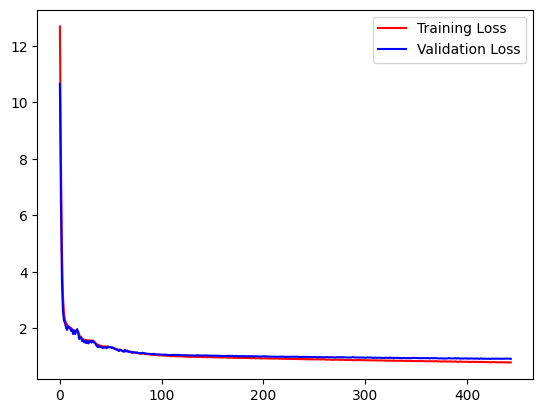

In [27]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

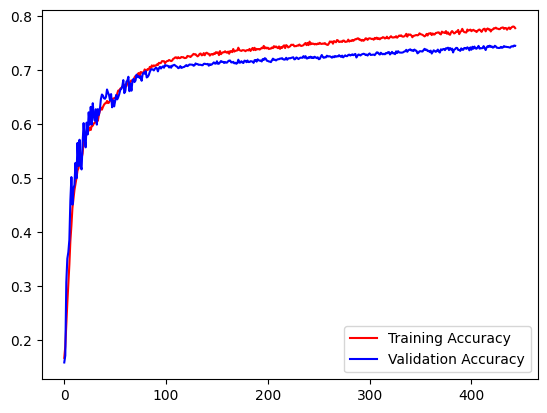

In [28]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [29]:
loss = model.evaluate(X_test,y_test)
print("Test Accurancy: " + str(loss[1]))

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7273 - loss: 0.9104
Test Accurancy: 0.744685173034668


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


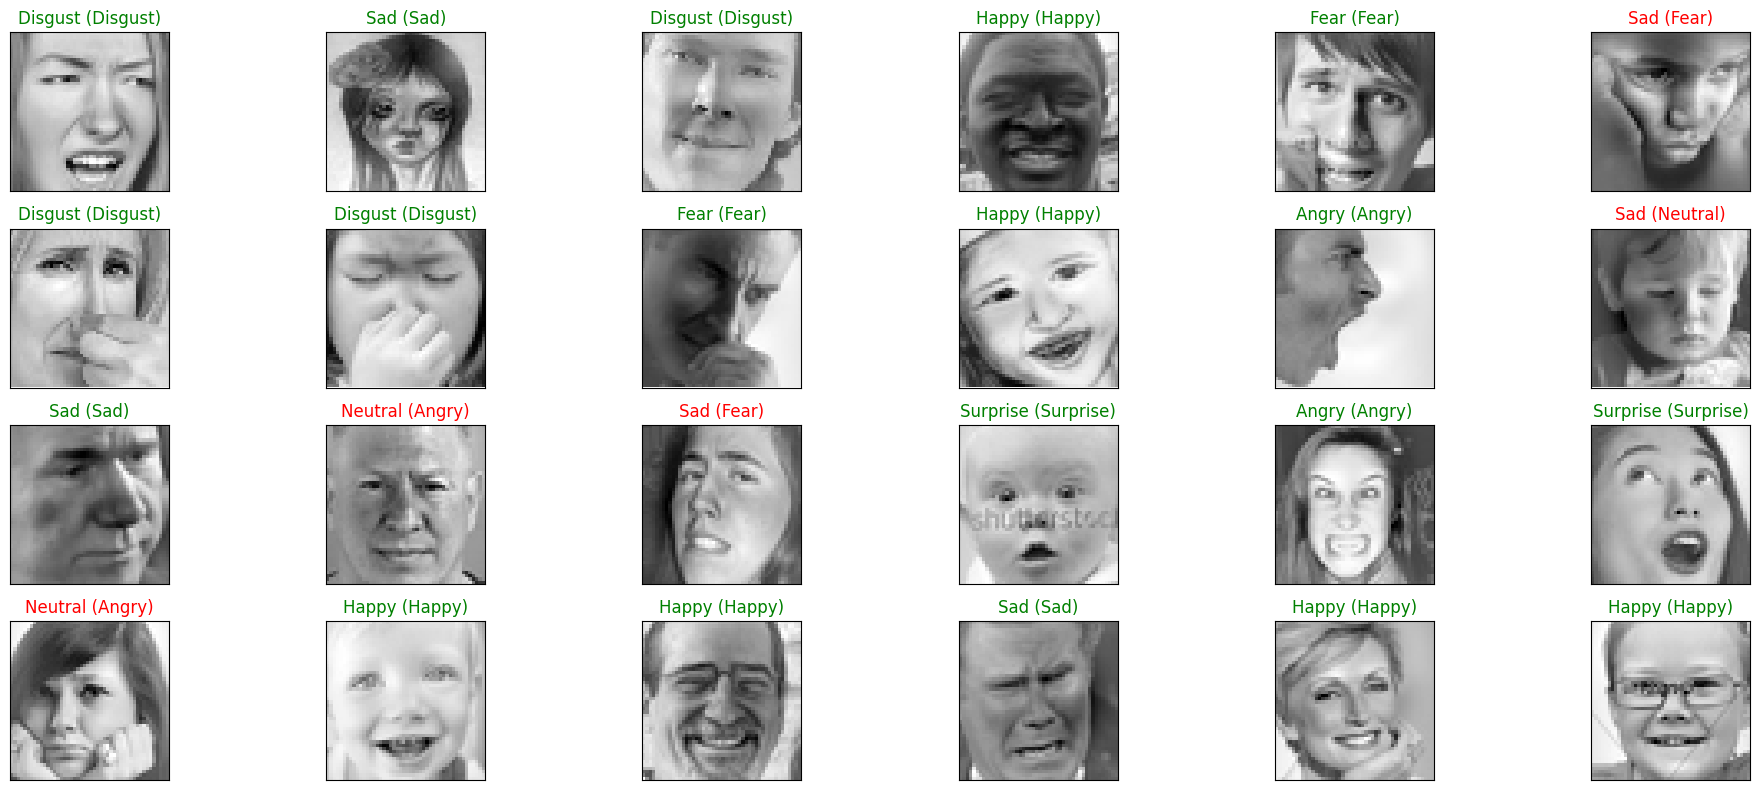

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dự đoán
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)  # Lấy nhãn dự đoán (0-6)
y_true = np.argmax(y_test, axis=1)  # Lấy nhãn thực tế từ one-hot encoding

# Từ điển nhãn
label_dict = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Neutral',
    5: 'Sad',
    6: 'Surprise'
}

# Vẽ 24 hình ảnh ngẫu nhiên
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]), cmap='gray')  # Hiển thị ảnh (grayscale)
    
    # Lấy chỉ số và nhãn
    predict_label = label_dict[y_pred[index]]
    true_label = label_dict[y_true[index]]

    # Đặt tiêu đề với màu sắc phù hợp
    color = "green" if y_pred[index] == y_true[index] else "red"
    ax.set_title(f"{predict_label} ({true_label})", color=color)

plt.tight_layout()
plt.show()

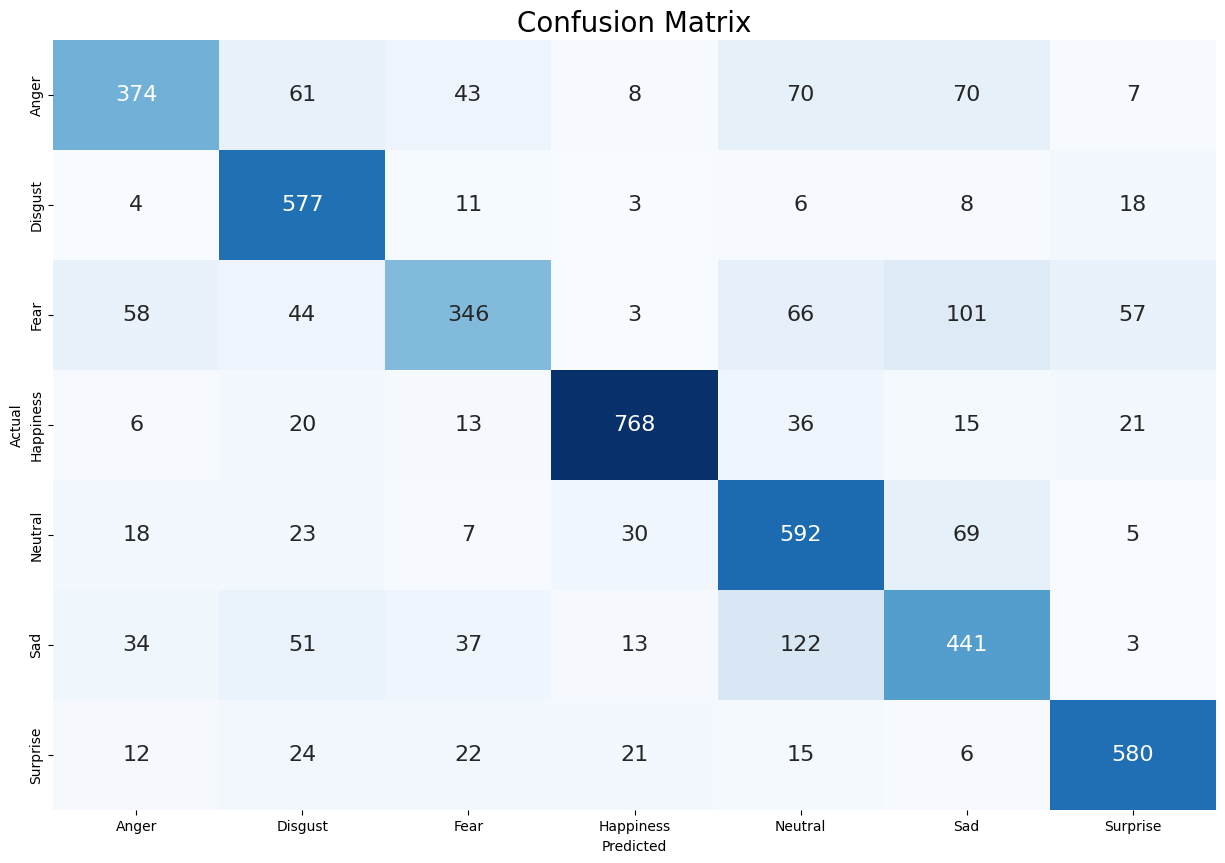

In [31]:
cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.739     0.591     0.657       633
           1      0.721     0.920     0.809       627
           2      0.722     0.513     0.600       675
           3      0.908     0.874     0.890       879
           4      0.653     0.796     0.717       744
           5      0.621     0.629     0.625       701
           6      0.839     0.853     0.846       680

    accuracy                          0.745      4939
   macro avg      0.743     0.739     0.735      4939
weighted avg      0.749     0.745     0.740      4939

